In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Load the dataset
file_path = r'C:\Users\PC\Documents\DOCUMENTS\Data_Science_Resources\cinemaTicket_Ref.csv'
data = pd.read_csv(file_path, encoding='latin1')

In [4]:
# Convert date column to datetime if it exists
data['date'] = pd.to_datetime(data['date'])

In [5]:
# Fill missing values
data.ffill(inplace=True)

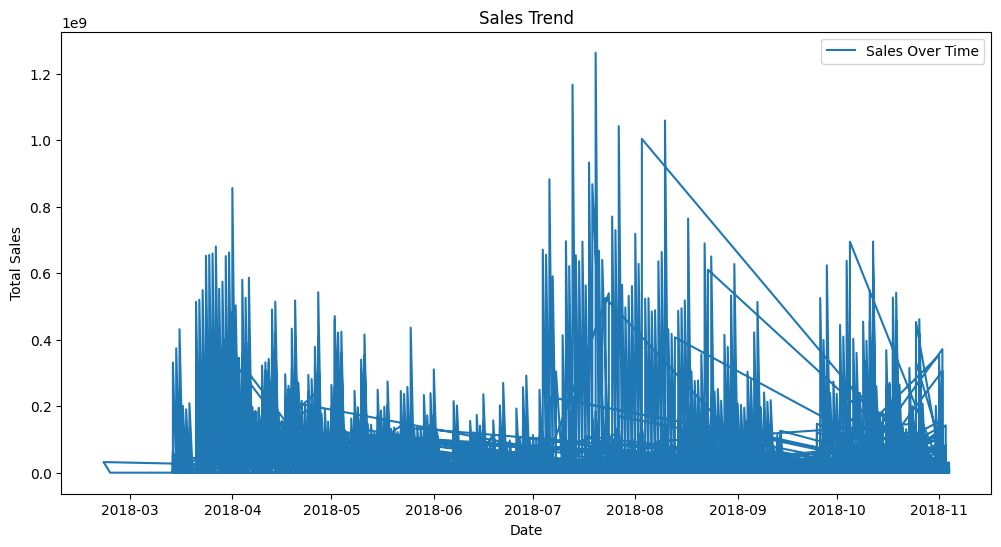

In [6]:
# Sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['total_sales'], label='Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend')
plt.legend()
plt.show()

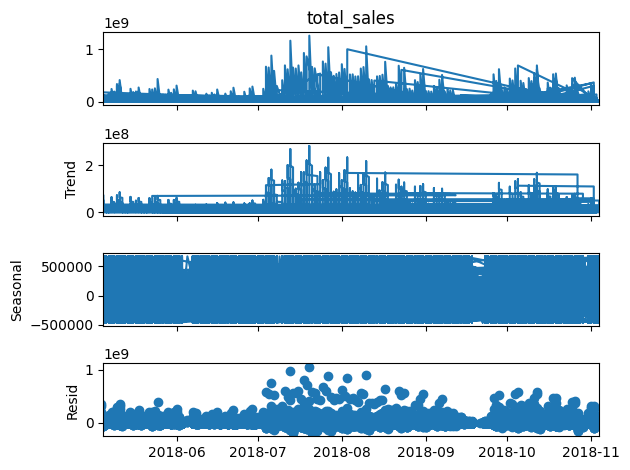

In [7]:
 # Time Series Decomposition
data.set_index('date', inplace=True)
decomposition = seasonal_decompose(data['total_sales'], model='additive', period=30)
decomposition.plot()
plt.show()

In [8]:
# ARIMA model
model = ARIMA(data['total_sales'], order=(1, 1, 1))
results = model.fit()
print(results.summary())

c:\Users\PC\Documents\DOCUMENTS\python_projects\jupyter\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\PC\Documents\DOCUMENTS\python_projects\jupyter\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\PC\Documents\DOCUMENTS\python_projects\jupyter\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\PC\Documents\DOCUMENTS\python_projects\jupyter\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has

                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observations:               142524
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -2608484.928
Date:                Sat, 07 Dec 2024   AIC                        5216975.856
Time:                        11:06:19   BIC                        5217005.458
Sample:                             0   HQIC                       5216984.699
                             - 142524                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3563      0.003    130.296      0.000       0.351       0.362
ma.L1         -0.8083      0.002   -334.415      0.000      -0.813      -0.804
sigma2      4.771e+14   3.36e-18   1.42e+32      0.0

In [9]:
# Features and Target
features = data.drop(['cinema_code', 'total_sales', 'tickets_sold', 'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use', 'capacity'], axis=1, errors='ignore')
target = data['total_sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [10]:
# Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Predictions
predictions = model.predict(X_test)

In [12]:
# Evaluate Model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 846330993531685.0
R-squared: 0.15143210883238367
